# Helsinki Bikes Project

"Conclusion:
In this article, we looked at the Helsinki city bike system through the lens of descriptive statistics. This article barely scratched the surface of all the possible analyses that can be performed on the underlying dataset. Those interested in their own exploration can find the dataset on Kaggle"

**I will compliment the descriptive analysis with a machine learning model to predict rides**

# Data exploration & cleaning

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## File 1 - Bike Trips

In [2]:
file1 = pd.read_csv('database.csv', low_memory=False)

In [3]:
file1.shape

(12157458, 14)

In [4]:
file1.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [5]:
file1.dtypes

departure                  object
return                     object
departure_id               object
departure_name             object
return_id                  object
return_name                object
distance (m)              float64
duration (sec.)           float64
avg_speed (km/h)          float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
Air temperature (degC)    float64
dtype: object

In [6]:
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [7]:
for col in file1.columns:
    print(col)
    print(len(file1[col].unique()))

departure
8359376
return
8376121
departure_id
671
departure_name
347
return_id
558
return_name
348
distance (m)
21292
duration (sec.)
45084
avg_speed (km/h)
2300804
departure_latitude
347
departure_longitude
347
return_latitude
348
return_longitude
348
Air temperature (degC)
347


In [8]:
#Adding 4 new columns, splitting departure and return columns into 'departure_date', 'departure_time', 'return_date', 'return_time'

file1['departure'] = pd.to_datetime(file1['departure'])
file1['departure_date'] = file1['departure'].dt.date
file1['departure_time'] = file1['departure'].dt.time
file1['return'] = pd.to_datetime(file1['return'])
file1['return_date'] = file1['return'].dt.date
file1['return_time'] = file1['return'].dt.time

file1

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [9]:
file1.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
departure_date                0
departure_time                0
return_date                   0
return_time                   0
dtype: int64

In [10]:
#rename columns
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)', 'departure_date',
       'departure_time', 'return_date', 'return_time'],
      dtype='object')

In [11]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

original_list = ['departure', 'return', 'departure_id', 'departure_name', 'return_id',
                 'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
                 'departure_latitude', 'departure_longitude', 'return_latitude',
                 'return_longitude', 'Air temperature (degC)', 'departure_date',
                 'departure_time', 'return_date', 'return_time']

snake_case_list = [to_snake_case(item) for item in original_list]
print(snake_case_list)


['departure', 'return', 'departure_id', 'departure_name', 'return_id', 'return_name', 'distance_(m)', 'duration_(sec.)', 'avg_speed_(km/h)', 'departure_latitude', 'departure_longitude', 'return_latitude', 'return_longitude', 'air_temperature_(degc)', 'departure_date', 'departure_time', 'return_date', 'return_time']


In [12]:
file1.columns = snake_case_list
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [13]:
#Dropping duplicates
file1 = file1.drop_duplicates()
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [14]:
file1.isna().mean()*100

departure                 0.000000
return                    0.000000
departure_id              0.000000
departure_name            0.000000
return_id                 0.000000
return_name               0.000000
distance_(m)              0.000000
duration_(sec.)           0.000000
avg_speed_(km/h)          0.029201
departure_latitude        0.000000
departure_longitude       0.000000
return_latitude           0.000008
return_longitude          0.000008
air_temperature_(degc)    0.130802
departure_date            0.000000
departure_time            0.000000
return_date               0.000000
return_time               0.000000
dtype: float64

In [15]:
m_speed = file1['avg_speed_(km/h)'].mean()
m_speed

0.3355585469906318

In [16]:
m_temp = file1['air_temperature_(degc)'].mean()
m_temp

15.650438994217291

In [17]:
file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/3854245321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/3854245321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)


In [18]:
file1.isna().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance_(m)              0
duration_(sec.)           0
avg_speed_(km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           1
return_longitude          1
air_temperature_(degc)    0
departure_date            0
departure_time            0
return_date               0
return_time               0
dtype: int64

In [19]:
f1_cleaned = file1.dropna()

In [20]:
f1_cleaned.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [21]:
f1_cleaned.shape

(12157291, 18)

In [22]:
df = f1_cleaned

In [23]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [24]:
df[df['distance_(m)']<0]

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
1456090,2020-07-04 12:26:49,2020-07-04 12:49:33,140,Verkatehtaanpuisto,226.0,Lepolantie,-4289957.0,1362.0,-188.984890,60.213701,24.979728,60.239109,24.928595,16.4,2020-07-04,12:26:49,2020-07-04,12:49:33
1669654,2020-07-17 17:05:32,2020-07-17 17:33:08,208,Valimotie,547.0,Jämeräntaival,-4286859.0,1654.0,-155.508791,60.215922,24.876465,60.188118,24.835033,23.6,2020-07-17,17:05:32,2020-07-17,17:33:08
1783328,2020-07-23 21:36:33,2020-07-23 21:47:05,44,Sörnäinen (M),141.0,Intiankatu,-4292467.0,633.0,-406.868910,60.187736,24.960980,60.207858,24.967638,13.5,2020-07-23,21:36:33,2020-07-23,21:47:05
1912295,2020-07-31 23:45:28,2020-08-01 00:09:21,559,Pohjankulma,163.0,Lehtisaarentie,-4291050.0,1430.0,-180.044056,60.182880,24.794014,60.181813,24.850440,15.5,2020-07-31,23:45:28,2020-08-01,00:09:21
2294615,2020-08-20 16:08:40,2020-08-20 16:29:36,757,Painiitty,100.0,Teljäntie,-4290278.0,1255.0,-205.112892,60.235089,24.831397,60.209696,24.868739,21.8,2020-08-20,16:08:40,2020-08-20,16:29:36
6888855,2019-10-27 20:13:52,2019-10-27 20:23:02,579,Niittymaa,517.0,Länsituuli,-4290436.0,549.0,-468.900109,60.171127,24.775913,60.175358,24.802049,1.9,2019-10-27,20:13:52,2019-10-27,20:23:02
10027503,2018-10-15 19:01:14,2018-10-15 19:16:20,135.0,Velodrominrinne,40.0,Hakaniemi (M),-4286564.0,905.0,-284.192088,60.201061,24.944051,60.178106,24.952181,12.0,2018-10-15,19:01:14,2018-10-15,19:16:20


In [25]:
df.loc[1456090,['distance_(m)']] = [0]
df.loc[1669654,['distance_(m)']] = [0]
df.loc[1783328,['distance_(m)']] = [0]
df.loc[1912295,['distance_(m)']] = [0]
df.loc[2294615,['distance_(m)']] = [0]
df.loc[6888855,['distance_(m)']] = [0]
df.loc[10027503,['distance_(m)']] = [0]

In [26]:
df[df['distance_(m)']<0]

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time


In [27]:
df['month'] = df['departure'].dt.month
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2438391164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['departure'].dt.month


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10


In [28]:
df['year'] = df['departure'].dt.year
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/3852519227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['departure'].dt.year


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017


In [29]:
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['weekday'] = df['departure_date'].dt.day_name()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/1082588385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_date'] = pd.to_datetime(df['departure_date'])
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/1082588385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['departure_date'].dt.day_name()


In [30]:
pd.set_option('display.max_columns', None)
df['day'] = df['departure'].dt.day
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2780713555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['departure'].dt.day


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020,Monday,23
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020,Monday,23
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020,Monday,23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020,Monday,23
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020,Monday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017,Monday,30
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017,Monday,30
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017,Monday,30
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017,Monday,30


In [31]:
df = df[df['year'] != 2016]

In [32]:
target_month = 3
df = df[df['month'] != target_month]

In [33]:
df.shape

(11707844, 22)

In [34]:
df['year'].value_counts().sort_values()

2017    1606741
2020    3087714
2018    3225834
2019    3787555
Name: year, dtype: int64

In [35]:
#Decided to drop 2017 as there is fewer data than the other years to make an even comparison

In [36]:
df = df[df['year'] != 2017]

In [37]:
df['year'].value_counts()

2019    3787555
2018    3225834
2020    3087714
Name: year, dtype: int64

In [38]:
df['month'].value_counts().sort_values() #The city bike season starts on 1 April and ends on 31 October.

10     769220
4      902022
9     1227823
5     1694041
7     1752586
8     1860513
6     1894898
Name: month, dtype: int64

In [39]:
df['day'].value_counts().sort_values()

31    199565
2     293678
4     303146
22    304466
5     309651
11    311195
1     314277
12    314675
3     315048
29    315754
30    318103
6     320067
8     324133
20    325867
21    328805
13    330907
23    333337
7     333409
26    335082
9     337056
24    337254
14    338810
28    339297
19    342189
16    346894
15    347772
25    348969
10    353145
27    358395
17    358619
18    361538
Name: day, dtype: int64

In [40]:
df['day'].nunique()

31

In [41]:
df["biking_speed(km/h)"] = df["distance_(m)"] / df["duration_(sec.)"] * 3.6

In [42]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day,biking_speed(km/h)
41370,2020-04-01 00:04:08,2020-04-01 00:21:27,62,Länsisatamankatu,62.0,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,00:04:08,2020-04-01,00:21:27,4,2020,Wednesday,1,3.464740
41371,2020-04-01 00:12:31,2020-04-01 00:21:34,149,Toinen linja,16.0,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,00:12:31,2020-04-01,00:21:34,4,2020,Wednesday,1,15.872119
41372,2020-04-01 00:16:46,2020-04-01 00:46:09,118,Fleminginkatu,105.0,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,00:16:46,2020-04-01,00:46:09,4,2020,Wednesday,1,14.316744
41373,2020-04-01 00:19:29,2020-04-01 00:30:13,17,Varsapuistikko,13.0,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,00:19:29,2020-04-01,00:30:13,4,2020,Wednesday,1,10.833803
41374,2020-04-01 00:20:19,2020-04-01 00:46:14,226,Lepolantie,112.0,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,00:20:19,2020-04-01,00:46:14,4,2020,Wednesday,1,0.000000


In [43]:
df = df.drop(['avg_speed_(km/h)'],axis=1)

In [44]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day,biking_speed(km/h)
41370,2020-04-01 00:04:08,2020-04-01 00:21:27,62,Länsisatamankatu,62.0,Länsisatamankatu,999.0,1038.0,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,00:04:08,2020-04-01,00:21:27,4,2020,Wednesday,1,3.464740
41371,2020-04-01 00:12:31,2020-04-01 00:21:34,149,Toinen linja,16.0,Liisanpuistikko,2372.0,538.0,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,00:12:31,2020-04-01,00:21:34,4,2020,Wednesday,1,15.872119
41372,2020-04-01 00:16:46,2020-04-01 00:46:09,118,Fleminginkatu,105.0,Tilkantori,4299.0,1081.0,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,00:16:46,2020-04-01,00:46:09,4,2020,Wednesday,1,14.316744
41373,2020-04-01 00:19:29,2020-04-01 00:30:13,17,Varsapuistikko,13.0,Merisotilaantori,1923.0,639.0,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,00:19:29,2020-04-01,00:30:13,4,2020,Wednesday,1,10.833803
41374,2020-04-01 00:20:19,2020-04-01 00:46:14,226,Lepolantie,112.0,Rautatieläisenkatu,0.0,1552.0,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,00:20:19,2020-04-01,00:46:14,4,2020,Wednesday,1,0.000000


In [45]:
df.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance_(m)', 'duration_(sec.)', 'departure_latitude',
       'departure_longitude', 'return_latitude', 'return_longitude',
       'air_temperature_(degc)', 'departure_date', 'departure_time',
       'return_date', 'return_time', 'month', 'year', 'weekday', 'day',
       'biking_speed(km/h)'],
      dtype='object')

In [46]:
df['biking_speed(km/h)'].isna().mean()*100

0.03390718815559053

In [47]:
df.isna().mean()*100

departure                 0.000000
return                    0.000000
departure_id              0.000000
departure_name            0.000000
return_id                 0.000000
return_name               0.000000
distance_(m)              0.000000
duration_(sec.)           0.000000
departure_latitude        0.000000
departure_longitude       0.000000
return_latitude           0.000000
return_longitude          0.000000
air_temperature_(degc)    0.000000
departure_date            0.000000
departure_time            0.000000
return_date               0.000000
return_time               0.000000
month                     0.000000
year                      0.000000
weekday                   0.000000
day                       0.000000
biking_speed(km/h)        0.033907
dtype: float64

In [48]:
#I will drop the rows without speed, just 0.3

In [49]:
df = df[df['biking_speed(km/h)'].notnull() & (df['biking_speed(km/h)'] != 0)]

In [50]:
df.isna().mean()*100

departure                 0.0
return                    0.0
departure_id              0.0
departure_name            0.0
return_id                 0.0
return_name               0.0
distance_(m)              0.0
duration_(sec.)           0.0
departure_latitude        0.0
departure_longitude       0.0
return_latitude           0.0
return_longitude          0.0
air_temperature_(degc)    0.0
departure_date            0.0
departure_time            0.0
return_date               0.0
return_time               0.0
month                     0.0
year                      0.0
weekday                   0.0
day                       0.0
biking_speed(km/h)        0.0
dtype: float64

In [51]:
pivot_table = df.pivot_table(
    index=['year', 'month', 'day'],
    aggfunc='size',
    fill_value=0
)

pivot_table

year  month  day
2018  4      3       618
             4      1562
             5      2472
             6      3278
             7      4084
                    ... 
2020  10     27     4670
             28     6571
             29     7077
             30     6565
             31     4660
Length: 640, dtype: int64

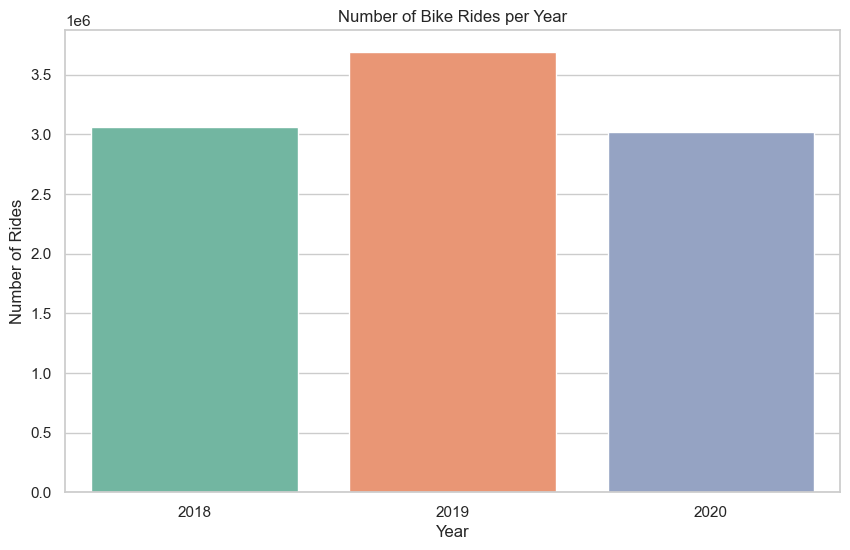

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', palette='Set2')
plt.title('Number of Bike Rides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.show()

In [53]:
df = df.drop(['departure','return'],axis=1)

In [54]:
df.dtypes

departure_id                      object
departure_name                    object
return_id                         object
return_name                       object
distance_(m)                     float64
duration_(sec.)                  float64
departure_latitude               float64
departure_longitude              float64
return_latitude                  float64
return_longitude                 float64
air_temperature_(degc)           float64
departure_date            datetime64[ns]
departure_time                    object
return_date                       object
return_time                       object
month                              int64
year                               int64
weekday                           object
day                                int64
biking_speed(km/h)               float64
dtype: object

In [55]:
df_numerical = df._get_numeric_data()
df_categorical = df.select_dtypes('object')

In [56]:
df_numerical

,distance_(m),duration_(sec.),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),month,year,day,biking_speed(km/h)
41370,999.0,1038.0,60.158928,24.909692,60.158928,24.909692,3.1,4,2020,1,3.464740
41371,2372.0,538.0,60.183164,24.944195,60.174182,24.961375,3.1,4,2020,1,15.872119
41372,4299.0,1081.0,60.189542,24.952160,60.202839,24.893476,3.1,4,2020,1,14.316744
41373,1923.0,639.0,60.173103,24.949519,60.167870,24.975534,3.1,4,2020,1,10.833803
41375,1376.0,292.0,60.163531,24.914517,60.160088,24.934066,3.1,4,2020,1,16.964384
...,...,...,...,...,...,...,...,...,...,...,...
10142545,762.0,257.0,60.163531,24.914517,60.158928,24.909692,9.4,10,2018,31,10.673930
10142546,369.0,143.0,60.180863,24.949400,60.183164,24.944195,9.4,10,2018,31,9.289510
10142547,6019.0,3100.0,60.149813,24.886109,60.157086,24.869306,9.4,10,2018,31,6.989806
10142548,2749.0,834.0,60.194234,24.957993,60.183868,24.919837,9.4,10,2018,31,11.866187


In [57]:
df_categorical

,departure_id,departure_name,return_id,return_name,departure_time,return_date,return_time,weekday
41370,62,Länsisatamankatu,62.0,Länsisatamankatu,00:04:08,2020-04-01,00:21:27,Wednesday
41371,149,Toinen linja,16.0,Liisanpuistikko,00:12:31,2020-04-01,00:21:34,Wednesday
41372,118,Fleminginkatu,105.0,Tilkantori,00:16:46,2020-04-01,00:46:09,Wednesday
41373,17,Varsapuistikko,13.0,Merisotilaantori,00:19:29,2020-04-01,00:30:13,Wednesday
41375,30,Itämerentori,67.0,Perämiehenkatu,00:22:32,2020-04-01,00:27:29,Wednesday
...,...,...,...,...,...,...,...,...
10142545,30.0,Itämerentori,61.0,Länsisatamankatu,23:55:57,2018-11-01,00:00:00,Wednesday
10142546,41.0,Ympyrätalo,149.0,Toinen linja,23:57:04,2018-10-31,23:59:32,Wednesday
10142547,50.0,Melkonkuja,143.0,Kuikkarinne,23:57:22,2018-11-01,00:49:00,Wednesday
10142548,129.0,Pernajantie,75.0,Korjaamo,23:57:43,2018-11-01,00:11:00,Wednesday


In [58]:
df['departure_date'] = df['departure_date'].astype('object')

In [59]:
df.dtypes

departure_id               object
departure_name             object
return_id                  object
return_name                object
distance_(m)              float64
duration_(sec.)           float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
air_temperature_(degc)    float64
departure_date             object
departure_time             object
return_date                object
return_time                object
month                       int64
year                        int64
weekday                    object
day                         int64
biking_speed(km/h)        float64
dtype: object

## The rides decrease in 2020 might have been caused by the impact of COVID-19

### Could it also be weather related? other reasons?

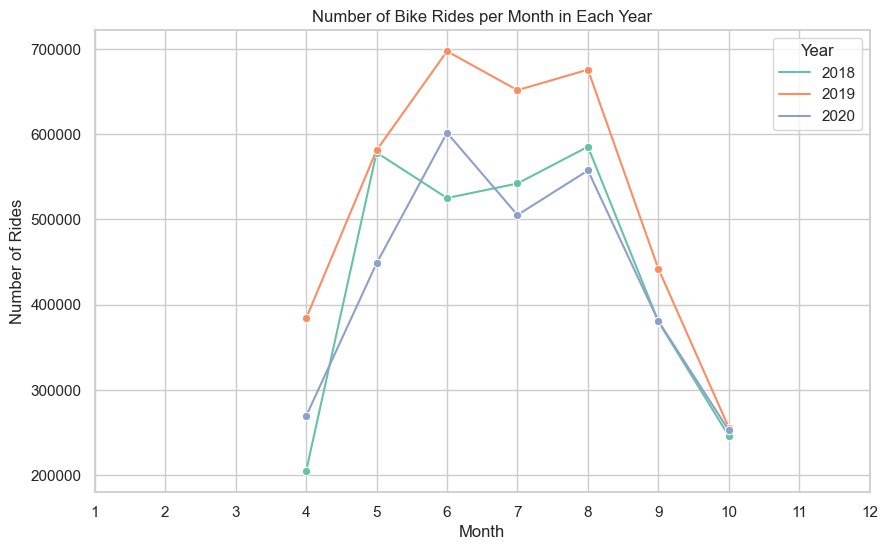

In [60]:
ride_counts = df.groupby(['year', 'month']).size().reset_index(name='ride_count')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=ride_counts, x='month', y='ride_count', hue='year', hue_order=[2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Number of Bike Rides per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title ='Year')

plt.show()

## The higher number of rides start increasing in May and start going down in August
### This can be weather related, we will look into this correlation later in the analysis.

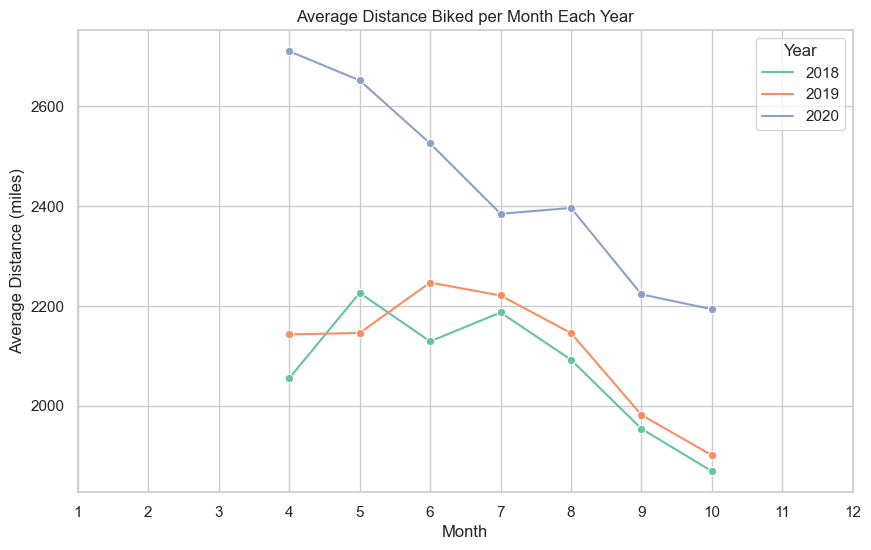

In [61]:
avg_distance_per_month = df.groupby(['year', 'month'])['distance_(m)'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=avg_distance_per_month, x='month', y='distance_(m)', hue='year', hue_order=[2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Average Distance Biked per Month Each Year')
plt.xlabel('Month')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title='Year')

plt.show()

## Surprisingly, the longest rides were recorded in 2020
### How come?

- Maybe not so much snow that year? maybe not so many bike docs available?

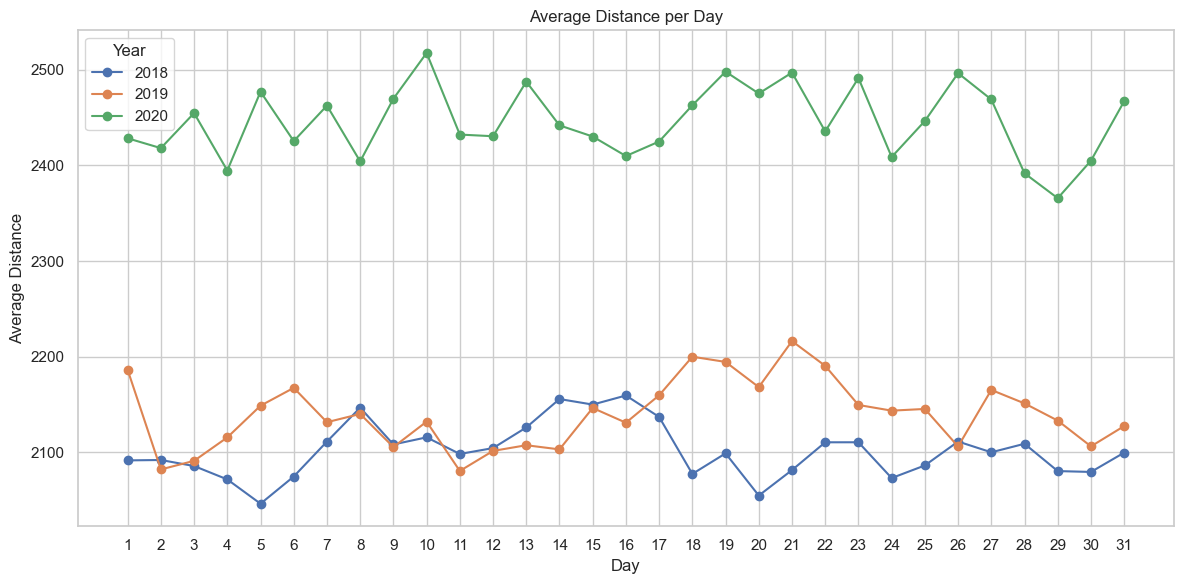

In [62]:
plt.figure(figsize=(12, 6))

for year in [2018, 2019, 2020]:
    avg_distance_per_year = df[df['year'] == year].groupby('day')['distance_(m)'].mean()

    plt.plot(avg_distance_per_year.index, avg_distance_per_year.values, marker='o', label=str(year))

plt.title('Average Distance per Day')
plt.xlabel('Day')
plt.ylabel('Average Distance')
plt.xticks(avg_distance_per_year.index)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

## Average distance per day in 2018 and 2019 are similar, under 2,2 km, in 2020, the average distance increased.

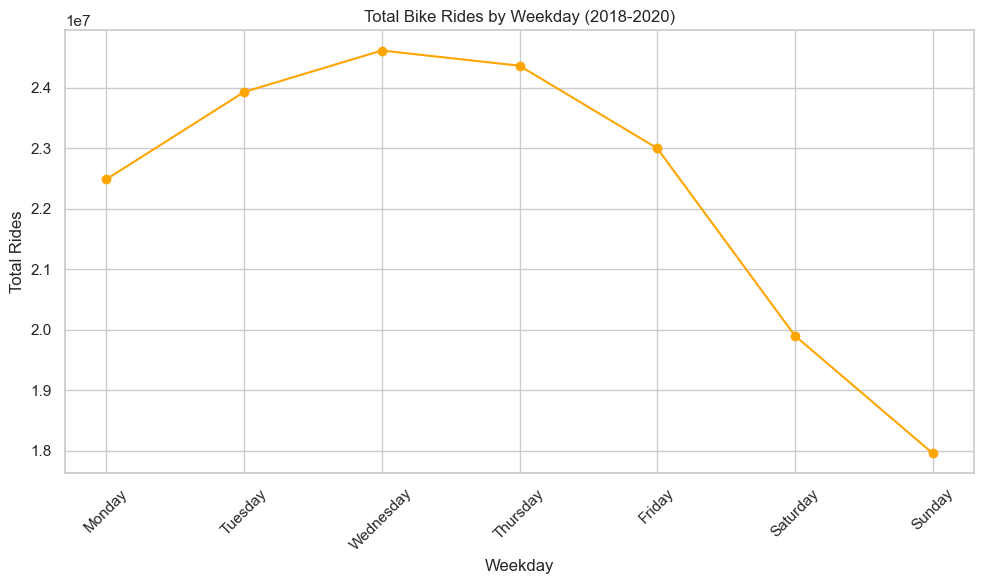

In [63]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_total_rides = df.groupby('weekday')['day'].sum().reindex(weekday_order)

plt.figure(figsize=(10, 6))

weekday_total_rides.plot(marker='o', color='orange')

plt.title('Total Bike Rides by Weekday (2018-2020)')
plt.xlabel('Weekday')
plt.ylabel('Total Rides')
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)
plt.tight_layout()

plt.show()

In [64]:
columns_to_drop = ['departure_id', 'return_id']
df = df.drop(columns=columns_to_drop)

In [65]:
df.shape

(9764850, 18)

In [66]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')
df['departure_hour'] = df['departure_time'].dt.hour

In [67]:
df['departure_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

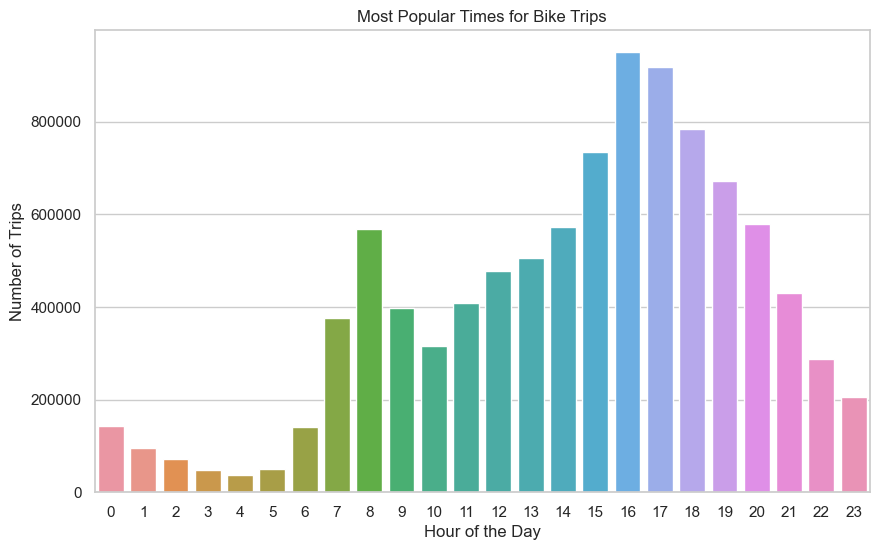

In [68]:
hour_counts = df['departure_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Most Popular Times for Bike Trips')
plt.xticks(hour_counts.index)
plt.show()

## The most popular riding times are in the morning, at 8am, and then between 16:00 and 18:00

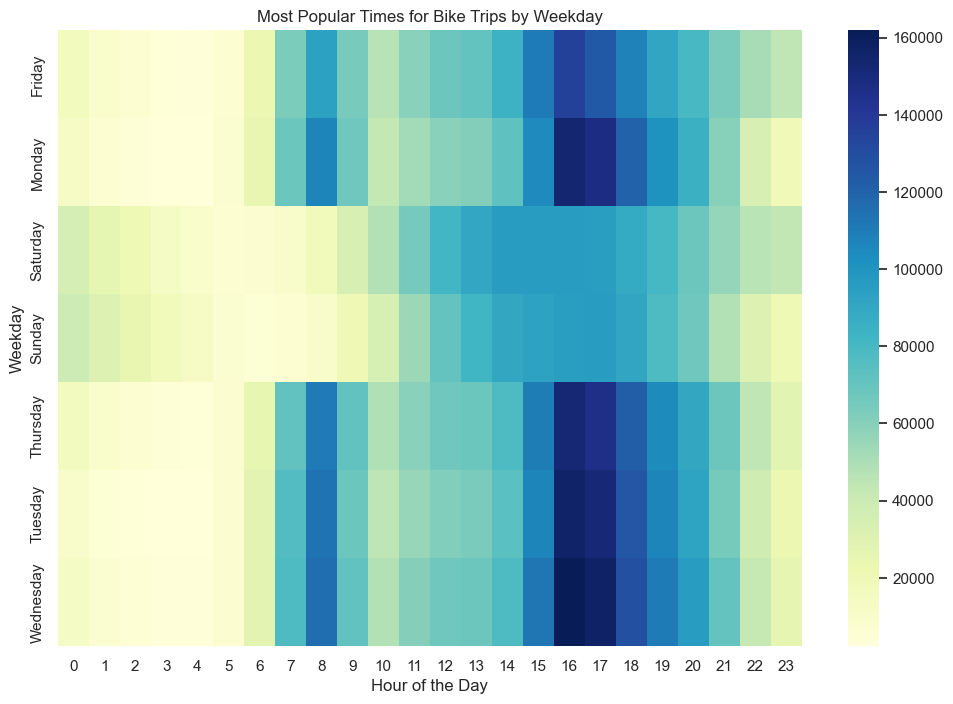

In [69]:
import datetime

hour_weekday_counts = df.groupby(['weekday', 'departure_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(hour_weekday_counts, cmap='YlGnBu', annot=False, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.title('Most Popular Times for Bike Trips by Weekday')
plt.show()

## Here we can see that during weekdays, the most popular times are from 16:00, but not on weekends.
### We could here make an assumption that users of the bikes use them mostly to commute from work.
### We will look into the correlation between hour/weekday and location.

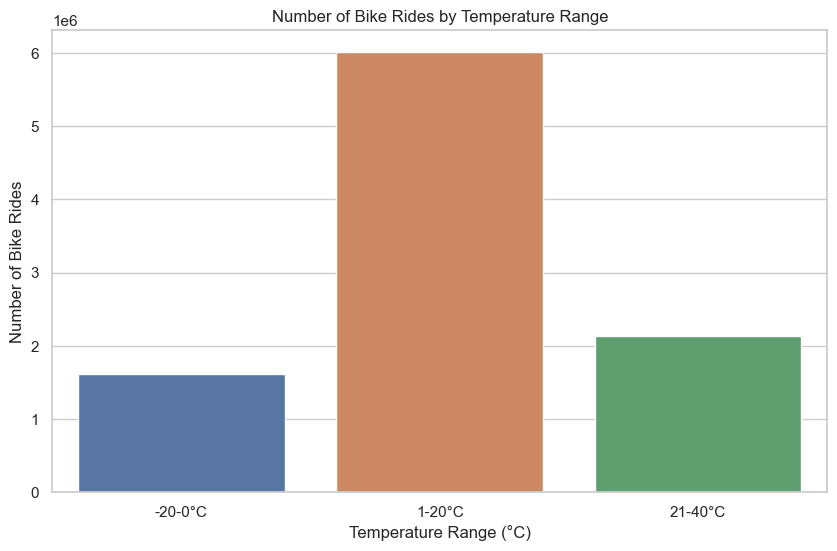

In [70]:
temperature_bins = [-20, 10, 20, 40]
bin_labels = ['-20-0°C', '1-20°C', '21-40°C']

df['temperature_range'] = pd.cut(df['air_temperature_(degc)'], bins=temperature_bins, labels=bin_labels)

grouped_data = df.groupby('temperature_range').size().reset_index(name='bike_rides_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='bike_rides_count', data=grouped_data)
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Number of Bike Rides')
plt.title('Number of Bike Rides by Temperature Range')
plt.show()

# ------------------------------------------------------------------------------------------

## File 2 - Weather

In [71]:
file2 = pd.read_csv('weather.csv')
file2

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2016,1,1,00:00,UTC,-1.0,-1,-4.6
1,2016,1,2,00:00,UTC,-1.0,-1,-7.0
2,2016,1,3,00:00,UTC,3.2,-1,-8.7
3,2016,1,4,00:00,UTC,-1.0,4,-11.2
4,2016,1,5,00:00,UTC,0.6,4,-17.6
...,...,...,...,...,...,...,...,...
1822,2020,12,27,00:00,UTC,0.4,-1,1.1
1823,2020,12,28,00:00,UTC,4.2,-1,0.7
1824,2020,12,29,00:00,UTC,6.9,-1,1.1
1825,2020,12,30,00:00,UTC,2.9,-1,3.0


In [72]:
file2.columns

Index(['Year', 'm', 'd', 'Time', 'Time zone', 'Precipitation amount (mm)',
       'Snow depth (cm)', 'Air temperature (degC)'],
      dtype='object')

In [73]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

column_names = [
    "Year", "m", "d", "Time", "Time zone", 
    "Precipitation amount (mm)", "Snow depth (cm)", "Air temperature (degC)"
]

snake_case_column_names = [to_snake_case(column) for column in column_names]
print(snake_case_column_names)


['year', 'm', 'd', 'time', 'time_zone', 'precipitation_amount_(mm)', 'snow_depth_(cm)', 'air_temperature_(degc)']


In [74]:
file2.columns = snake_case_column_names

In [75]:
file2

,year,m,d,time,time_zone,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,00:00,UTC,-1.0,-1,-4.6
1,2016,1,2,00:00,UTC,-1.0,-1,-7.0
2,2016,1,3,00:00,UTC,3.2,-1,-8.7
3,2016,1,4,00:00,UTC,-1.0,4,-11.2
4,2016,1,5,00:00,UTC,0.6,4,-17.6
...,...,...,...,...,...,...,...,...
1822,2020,12,27,00:00,UTC,0.4,-1,1.1
1823,2020,12,28,00:00,UTC,4.2,-1,0.7
1824,2020,12,29,00:00,UTC,6.9,-1,1.1
1825,2020,12,30,00:00,UTC,2.9,-1,3.0


In [76]:
file2.columns

Index(['year', 'm', 'd', 'time', 'time_zone', 'precipitation_amount_(mm)',
       'snow_depth_(cm)', 'air_temperature_(degc)'],
      dtype='object')

In [77]:
mean_precipitation = file2[file2['precipitation_amount_(mm)'] >= 0]['precipitation_amount_(mm)'].mean()
file2['precipitation_amount_(mm)'] = file2['precipitation_amount_(mm)'].apply(lambda x: mean_precipitation if x < 0 else x)

In [78]:
file2.dtypes

year                           int64
m                              int64
d                              int64
time                          object
time_zone                     object
precipitation_amount_(mm)    float64
snow_depth_(cm)               object
air_temperature_(degc)       float64
dtype: object

In [79]:
file2['precipitation_amount_(mm)'].value_counts

<bound method IndexOpsMixin.value_counts of 0       3.864773
1       3.864773
2       3.200000
3       3.864773
4       0.600000
          ...   
1822    0.400000
1823    4.200000
1824    6.900000
1825    2.900000
1826    2.600000
Name: precipitation_amount_(mm), Length: 1827, dtype: float64>

In [80]:
file2['snow_depth_(cm)'] = pd.to_numeric(file2['snow_depth_(cm)'], errors='coerce')
file2['snow_depth_(cm)'] = file2['snow_depth_(cm)'].astype(float)

In [81]:
file2.dtypes

year                           int64
m                              int64
d                              int64
time                          object
time_zone                     object
precipitation_amount_(mm)    float64
snow_depth_(cm)              float64
air_temperature_(degc)       float64
dtype: object

In [82]:

mean_snow = file2.loc[file2['snow_depth_(cm)'] >= 0, 'snow_depth_(cm)'].mean()

# Replace negative values with the calculated mean
file2.loc[file2['snow_depth_(cm)'] < 0, 'snow_depth_(cm)'] = mean_snow


In [83]:
file2.drop(columns=['time','time_zone'], inplace=True)

In [84]:
file2

,year,m,d,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,3.864773,10.25,-4.6
1,2016,1,2,3.864773,10.25,-7.0
2,2016,1,3,3.200000,10.25,-8.7
3,2016,1,4,3.864773,4.00,-11.2
4,2016,1,5,0.600000,4.00,-17.6
...,...,...,...,...,...,...
1822,2020,12,27,0.400000,10.25,1.1
1823,2020,12,28,4.200000,10.25,0.7
1824,2020,12,29,6.900000,10.25,1.1
1825,2020,12,30,2.900000,10.25,3.0


In [85]:
file2.rename(columns={'m': 'month', 'd': 'day'}, inplace=True)
file2

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,3.864773,10.25,-4.6
1,2016,1,2,3.864773,10.25,-7.0
2,2016,1,3,3.200000,10.25,-8.7
3,2016,1,4,3.864773,4.00,-11.2
4,2016,1,5,0.600000,4.00,-17.6
...,...,...,...,...,...,...
1822,2020,12,27,0.400000,10.25,1.1
1823,2020,12,28,4.200000,10.25,0.7
1824,2020,12,29,6.900000,10.25,1.1
1825,2020,12,30,2.900000,10.25,3.0


In [86]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])
file2

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined
0,2016,1,1,3.864773,10.25,-4.6,2016-01-01
1,2016,1,2,3.864773,10.25,-7.0,2016-01-02
2,2016,1,3,3.200000,10.25,-8.7,2016-01-03
3,2016,1,4,3.864773,4.00,-11.2,2016-01-04
4,2016,1,5,0.600000,4.00,-17.6,2016-01-05
...,...,...,...,...,...,...,...
1822,2020,12,27,0.400000,10.25,1.1,2020-12-27
1823,2020,12,28,4.200000,10.25,0.7,2020-12-28
1824,2020,12,29,6.900000,10.25,1.1,2020-12-29
1825,2020,12,30,2.900000,10.25,3.0,2020-12-30


In [87]:
file2.isna().sum()

year                         0
month                        0
day                          0
precipitation_amount_(mm)    0
snow_depth_(cm)              5
air_temperature_(degc)       0
date_combined                0
dtype: int64

In [88]:
file2 = file2.dropna()

In [89]:
file2.isna().sum()

year                         0
month                        0
day                          0
precipitation_amount_(mm)    0
snow_depth_(cm)              0
air_temperature_(degc)       0
date_combined                0
dtype: int64

In [90]:
file2 = file2[file2['year'] != 2016]

In [91]:
file2['date_combined'] = file2['date_combined'].astype('object')
file2.dtypes

year                           int64
month                          int64
day                            int64
precipitation_amount_(mm)    float64
snow_depth_(cm)              float64
air_temperature_(degc)       float64
date_combined                 object
dtype: object

In [92]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])

monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
yearly_avg = file2.groupby(file2['year']).mean()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2372593894.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2372593894.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = file2.groupby(file2['year']).mean()


In [93]:
file2 = file2[file2['year'] != 2017]

In [94]:
file2.dtypes

year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)           float64
snow_depth_(cm)                     float64
air_temperature_(degc)              float64
date_combined                datetime64[ns]
dtype: object

In [95]:
file2.dtypes

year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)           float64
snow_depth_(cm)                     float64
air_temperature_(degc)              float64
date_combined                datetime64[ns]
dtype: object

In [96]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])

monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
yearly_avg = file2.groupby(file2['year']).mean()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2372593894.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_12061/2372593894.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = file2.groupby(file2['year']).mean()


In [97]:
pivot_monthly_precipitation = file2.pivot_table(values='precipitation_amount_(mm)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

pivot_monthly_snow_depth = file2.pivot_table(values='snow_depth_(cm)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

pivot_monthly_air_temperature = file2.pivot_table(values='air_temperature_(degc)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

- Make plot

In [98]:
pivot_monthly_precipitation #avg

date_combined,2018,2019,2020
date_combined,,,
1,3.011034,3.444611,3.205718
2,3.670211,3.289732,4.501450
3,3.414846,2.934751,3.585044
4,3.190227,3.556136,3.232386
5,3.751629,4.116166,3.966642
6,3.919848,3.354167,5.317500
7,4.293218,4.822434,4.304582
8,4.279362,5.020345,4.718255
9,4.311212,3.709432,4.158864


In [99]:
pivot_monthly_snow_depth

date_combined,2018,2019,2020
date_combined,,,
1,8.475806,17.129032,10.250000
2,17.571429,26.750000,10.250000
3,17.419355,9.967742,10.250000
4,10.633333,10.250000,9.733333
5,10.250000,10.250000,10.250000
6,10.250000,10.250000,10.250000
7,10.250000,10.250000,10.250000
8,10.250000,10.250000,10.250000
9,10.250000,10.250000,10.250000


In [100]:
pivot_monthly_air_temperature

date_combined,2018,2019,2020
date_combined,,,
1,-1.151613,-4.603226,3.012903
2,-6.975000,0.367857,1.420690
3,-3.564516,0.448387,2.429032
4,4.980000,6.713333,5.093333
5,14.513333,10.309677,9.574194
6,15.323333,17.276667,17.920000
7,21.125806,17.548387,16.690323
8,18.558065,17.335484,17.145161
9,13.916667,12.160000,13.773333


In [101]:
file2.head()

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined
731,2018,1,1,4.500000,3.00,1.7,2018-01-01
732,2018,1,2,3.864773,10.25,4.3,2018-01-02
733,2018,1,3,0.900000,10.25,3.2,2018-01-03
734,2018,1,4,2.700000,10.25,2.8,2018-01-04
735,2018,1,5,3.900000,10.25,4.0,2018-01-05


In [102]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn/Fall'

# Apply the function to create a new 'season' column
file2['season'] = file2['month'].apply(get_season)

file2.head()

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined,season
731,2018,1,1,4.500000,3.00,1.7,2018-01-01,Winter
732,2018,1,2,3.864773,10.25,4.3,2018-01-02,Winter
733,2018,1,3,0.900000,10.25,3.2,2018-01-03,Winter
734,2018,1,4,2.700000,10.25,2.8,2018-01-04,Winter
735,2018,1,5,3.900000,10.25,4.0,2018-01-05,Winter


In [103]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 731 to 1826
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       1091 non-null   int64         
 1   month                      1091 non-null   int64         
 2   day                        1091 non-null   int64         
 3   precipitation_amount_(mm)  1091 non-null   float64       
 4   snow_depth_(cm)            1091 non-null   float64       
 5   air_temperature_(degc)     1091 non-null   float64       
 6   date_combined              1091 non-null   datetime64[ns]
 7   season                     1091 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 76.7+ KB


In [104]:
file2.dtypes

year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)           float64
snow_depth_(cm)                     float64
air_temperature_(degc)              float64
date_combined                datetime64[ns]
season                               object
dtype: object

In [105]:
file2['date_combined'] = file2['date_combined'].astype('object')

In [106]:
file2.dtypes

year                           int64
month                          int64
day                            int64
precipitation_amount_(mm)    float64
snow_depth_(cm)              float64
air_temperature_(degc)       float64
date_combined                 object
season                        object
dtype: object

In [107]:
file2['precipitation_amount_(mm)'].value_counts()

3.864773     584
0.100000      35
0.200000      25
0.900000      23
0.300000      20
            ... 
6.700000       1
16.200000      1
14.100000      1
23.100000      1
11.800000      1
Name: precipitation_amount_(mm), Length: 124, dtype: int64

# Merged datasets

# ----------------------------------------------------------------------------------------

In [184]:
print(df.columns)
print(file2.columns)

Index(['departure_name', 'return_name', 'distance_(m)', 'duration_(sec.)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'air_temperature_(degc)', 'date_combined',
       'departure_time', 'return_date', 'return_time', 'month', 'year',
       'weekday', 'day', 'biking_speed(km/h)', 'departure_hour',
       'temperature_range'],
      dtype='object')
Index(['year', 'month', 'day', 'precipitation_amount_(mm)', 'snow_depth_(cm)',
       'air_temperature_(degc)', 'date_combined', 'season'],
      dtype='object')


In [185]:
df = df.rename(columns = {'departure_date':'date_combined'})  
df.columns

Index(['departure_name', 'return_name', 'distance_(m)', 'duration_(sec.)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'air_temperature_(degc)', 'date_combined',
       'departure_time', 'return_date', 'return_time', 'month', 'year',
       'weekday', 'day', 'biking_speed(km/h)', 'departure_hour',
       'temperature_range'],
      dtype='object')

In [186]:
merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

(9734079, 27)

In [187]:
df['date_combined'] = pd.to_datetime(df['date_combined'])
file2['date_combined'] = pd.to_datetime(file2['date_combined'])

merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

(9734079, 27)

In [188]:
merged_df.head()

,departure_name,return_name,distance_(m),duration_(sec.),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,month_x,year_x,weekday,day_x,biking_speed(km/h),departure_hour,temperature_range,year_y,month_y,day_y,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)_y,season
0,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,1900-01-01 00:04:08,2020-04-01,00:21:27,4,2020,Wednesday,1,3.464740,0,-20-0°C,2020,4,1,0.3,10.25,4.1,Spring
1,Toinen linja,Liisanpuistikko,2372.0,538.0,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,1900-01-01 00:12:31,2020-04-01,00:21:34,4,2020,Wednesday,1,15.872119,0,-20-0°C,2020,4,1,0.3,10.25,4.1,Spring
2,Fleminginkatu,Tilkantori,4299.0,1081.0,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,1900-01-01 00:16:46,2020-04-01,00:46:09,4,2020,Wednesday,1,14.316744,0,-20-0°C,2020,4,1,0.3,10.25,4.1,Spring
3,Varsapuistikko,Merisotilaantori,1923.0,639.0,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,1900-01-01 00:19:29,2020-04-01,00:30:13,4,2020,Wednesday,1,10.833803,0,-20-0°C,2020,4,1,0.3,10.25,4.1,Spring
4,Itämerentori,Perämiehenkatu,1376.0,292.0,60.163531,24.914517,60.160088,24.934066,3.1,2020-04-01,1900-01-01 00:22:32,2020-04-01,00:27:29,4,2020,Wednesday,1,16.964384,0,-20-0°C,2020,4,1,0.3,10.25,4.1,Spring


In [189]:
merged_df.isna().sum()

departure_name               0
return_name                  0
distance_(m)                 0
duration_(sec.)              0
departure_latitude           0
departure_longitude          0
return_latitude              0
return_longitude             0
air_temperature_(degc)_x     0
date_combined                0
departure_time               0
return_date                  0
return_time                  0
month_x                      0
year_x                       0
weekday                      0
day_x                        0
biking_speed(km/h)           0
departure_hour               0
temperature_range            0
year_y                       0
month_y                      0
day_y                        0
precipitation_amount_(mm)    0
snow_depth_(cm)              0
air_temperature_(degc)_y     0
season                       0
dtype: int64

In [190]:
merged_df.dtypes

departure_name                       object
return_name                          object
distance_(m)                        float64
duration_(sec.)                     float64
departure_latitude                  float64
departure_longitude                 float64
return_latitude                     float64
return_longitude                    float64
air_temperature_(degc)_x            float64
date_combined                datetime64[ns]
departure_time               datetime64[ns]
return_date                          object
return_time                          object
month_x                               int64
year_x                                int64
weekday                              object
day_x                                 int64
biking_speed(km/h)                  float64
departure_hour                        int64
temperature_range                  category
year_y                                int64
month_y                               int64
day_y                           

In [191]:
merged_df['date_combined'] = merged_df['date_combined'].astype('object')

In [192]:
merged_df.dtypes

departure_name                       object
return_name                          object
distance_(m)                        float64
duration_(sec.)                     float64
departure_latitude                  float64
departure_longitude                 float64
return_latitude                     float64
return_longitude                    float64
air_temperature_(degc)_x            float64
date_combined                        object
departure_time               datetime64[ns]
return_date                          object
return_time                          object
month_x                               int64
year_x                                int64
weekday                              object
day_x                                 int64
biking_speed(km/h)                  float64
departure_hour                        int64
temperature_range                  category
year_y                                int64
month_y                               int64
day_y                           

In [193]:
merged_df['departure_time'] = merged_df['departure_time'].astype('object')

In [194]:
merged_df.dtypes

departure_name                 object
return_name                    object
distance_(m)                  float64
duration_(sec.)               float64
departure_latitude            float64
departure_longitude           float64
return_latitude               float64
return_longitude              float64
air_temperature_(degc)_x      float64
date_combined                  object
departure_time                 object
return_date                    object
return_time                    object
month_x                         int64
year_x                          int64
weekday                        object
day_x                           int64
biking_speed(km/h)            float64
departure_hour                  int64
temperature_range            category
year_y                          int64
month_y                         int64
day_y                           int64
precipitation_amount_(mm)     float64
snow_depth_(cm)               float64
air_temperature_(degc)_y      float64
season      

In [195]:
columns_to_drop = ['month_x', 'year_x','day_x','air_temperature_(degc)_y']
merged_df = merged_df.drop(columns_to_drop, axis=1)

In [196]:
merged_df.shape

(9734079, 23)

In [197]:
merged_df['snow_depth_(cm)'].isna().sum()

0

In [198]:
merged_df.isna().sum()

departure_name               0
return_name                  0
distance_(m)                 0
duration_(sec.)              0
departure_latitude           0
departure_longitude          0
return_latitude              0
return_longitude             0
air_temperature_(degc)_x     0
date_combined                0
departure_time               0
return_date                  0
return_time                  0
weekday                      0
biking_speed(km/h)           0
departure_hour               0
temperature_range            0
year_y                       0
month_y                      0
day_y                        0
precipitation_amount_(mm)    0
snow_depth_(cm)              0
season                       0
dtype: int64

In [199]:
merged_df['time_in_minutes'] = merged_df['duration_(sec.)'] / 60

In [200]:
merged_df.shape

(9734079, 24)

In [201]:
merged_df = merged_df.rename(columns={'year_y': 'year', 'month_y': 'month', 'day_y':'day','time_in_minutes':'trip_duration_min'})
merged_df.head()

,departure_name,return_name,distance_(m),duration_(sec.),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,weekday,biking_speed(km/h),departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min
0,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01 00:00:00,1900-01-01 00:04:08,2020-04-01,00:21:27,Wednesday,3.464740,0,-20-0°C,2020,4,1,0.3,10.25,Spring,17.300000
1,Toinen linja,Liisanpuistikko,2372.0,538.0,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01 00:00:00,1900-01-01 00:12:31,2020-04-01,00:21:34,Wednesday,15.872119,0,-20-0°C,2020,4,1,0.3,10.25,Spring,8.966667
2,Fleminginkatu,Tilkantori,4299.0,1081.0,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01 00:00:00,1900-01-01 00:16:46,2020-04-01,00:46:09,Wednesday,14.316744,0,-20-0°C,2020,4,1,0.3,10.25,Spring,18.016667
3,Varsapuistikko,Merisotilaantori,1923.0,639.0,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01 00:00:00,1900-01-01 00:19:29,2020-04-01,00:30:13,Wednesday,10.833803,0,-20-0°C,2020,4,1,0.3,10.25,Spring,10.650000
4,Itämerentori,Perämiehenkatu,1376.0,292.0,60.163531,24.914517,60.160088,24.934066,3.1,2020-04-01 00:00:00,1900-01-01 00:22:32,2020-04-01,00:27:29,Wednesday,16.964384,0,-20-0°C,2020,4,1,0.3,10.25,Spring,4.866667


- Make plot

In [202]:
trip_duration_yearly_stats = merged_df.groupby('year')['trip_duration_min'].agg(['mean', 'median', 'count']).reset_index()
trip_duration_yearly_stats

,year,mean,median,count
0,2018,15.335568,9.750000,3035375
1,2019,15.667573,9.433333,3687411
2,2020,16.939471,10.866667,3011293


In [203]:
merged_df.dtypes

departure_name                 object
return_name                    object
distance_(m)                  float64
duration_(sec.)               float64
departure_latitude            float64
departure_longitude           float64
return_latitude               float64
return_longitude              float64
air_temperature_(degc)_x      float64
date_combined                  object
departure_time                 object
return_date                    object
return_time                    object
weekday                        object
biking_speed(km/h)            float64
departure_hour                  int64
temperature_range            category
year                            int64
month                           int64
day                             int64
precipitation_amount_(mm)     float64
snow_depth_(cm)               float64
season                         object
trip_duration_min             float64
dtype: object

In [204]:
merged_df = merged_df.drop(['duration_(sec.)'], axis=1)

In [205]:
merged_df.dtypes

departure_name                 object
return_name                    object
distance_(m)                  float64
departure_latitude            float64
departure_longitude           float64
return_latitude               float64
return_longitude              float64
air_temperature_(degc)_x      float64
date_combined                  object
departure_time                 object
return_date                    object
return_time                    object
weekday                        object
biking_speed(km/h)            float64
departure_hour                  int64
temperature_range            category
year                            int64
month                           int64
day                             int64
precipitation_amount_(mm)     float64
snow_depth_(cm)               float64
season                         object
trip_duration_min             float64
dtype: object

In [206]:
merged_df.rename(columns={'date_combined': 'departure_date'}, inplace=True)

In [207]:
merged_df.dtypes

departure_name                 object
return_name                    object
distance_(m)                  float64
departure_latitude            float64
departure_longitude           float64
return_latitude               float64
return_longitude              float64
air_temperature_(degc)_x      float64
departure_date                 object
departure_time                 object
return_date                    object
return_time                    object
weekday                        object
biking_speed(km/h)            float64
departure_hour                  int64
temperature_range            category
year                            int64
month                           int64
day                             int64
precipitation_amount_(mm)     float64
snow_depth_(cm)               float64
season                         object
trip_duration_min             float64
dtype: object

In [208]:
merged_df = merged_df.drop(['departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude'], axis=1)

In [209]:
merged_numerical = merged_df._get_numeric_data()
merged_categorical = merged_df.select_dtypes('object')

In [210]:
# # Exploring Numerical Data
# for column in merged_numerical.columns:
#     print(f"Column: {column}")
#     print(merged_numerical[column].describe())
#     print("------------------------")

#     # Plot histogram
#     plt.figure(figsize=(5, 3))
#     sns.histplot(data=merged_numerical, x=column, kde=True)
#     plt.title(f"Histogram - {column}")
#     plt.show()

#     # Box plot
#     plt.figure(figsize=(5, 3))
#     sns.boxplot(data=merged_numerical, x=column)
#     plt.title(f"Box Plot - {column}")
#     plt.show()

In [211]:
#I will remove outliers from precipitation amount, distance, biking_speed(km/h)

In [212]:
import pandas as pd

# Assuming merged_df is your DataFrame
biking_speed_column = merged_df['biking_speed(km/h)']

mean_speed = biking_speed_column.mean()
std_dev = biking_speed_column.std()
min_speed = biking_speed_column.min()
max_speed = biking_speed_column.max()
q1 = biking_speed_column.quantile(0.25)
q3 = biking_speed_column.quantile(0.75)

print("Mean:", mean_speed)
print("Standard Deviation:", std_dev)
print("Minimum:", min_speed)
print("Maximum:", max_speed)
print("Q1:", q1)
print("Q3:", q3)


Mean: 11.04376280254248
Standard Deviation: 4.186117855139442
Minimum: 3.42440344038399e-06
Maximum: 5815.8
Q1: 9.230503597122302
Q3: 13.418957345971565


In [213]:
from scipy import stats

z_scores = stats.zscore(biking_speed_column)
outliers_z = biking_speed_column[abs(z_scores) > 3]

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = biking_speed_column[(biking_speed_column < lower_bound) | (biking_speed_column > upper_bound)]

print("Outliers using Z-score method:", outliers_z)
print("Outliers using IQR method:", outliers_iqr)


Outliers using Z-score method: 1370       30.000316
1900       29.999996
3021       30.000014
4188       30.000000
4872       29.999980
             ...    
9726748    29.999928
9727089    29.999979
9727471    23.774497
9730998    30.000065
9731346    30.000000
Name: biking_speed(km/h), Length: 16122, dtype: float64
Outliers using IQR method: 35         2.329412
154        0.741176
159        0.553846
210        0.353905
336        0.300000
             ...   
9733943    0.872727
9733978    0.041851
9734017    0.248276
9734025    1.515789
9734057    0.342857
Name: biking_speed(km/h), Length: 479502, dtype: float64


In [214]:
distance_column = merged_df['distance_(m)']

mean_distance = distance_column.mean()
std_dev_distance = distance_column.std()
min_distance = distance_column.min()
max_distance = distance_column.max()
q1_distance = distance_column.quantile(0.25)
q3_distance = distance_column.quantile(0.75)

print("Mean distance:", mean_distance)
print("Standard Deviation distance:", std_dev_distance)
print("Minimum distance:", min_distance)
print("Maximum distance:", max_distance)
print("Q1 distance:", q1_distance)
print("Q3 distance:", q3_distance)

Mean distance: 2223.8438303418334
Standard Deviation distance: 2027.0200602193581
Minimum distance: 1.0
Maximum distance: 2106675.0
Q1 distance: 1051.0
Q3 distance: 2969.0


In [215]:
distance_column = merged_df['distance_(m)']

q1_distance = distance_column.quantile(0.25)
q3_distance = distance_column.quantile(0.75)
iqr_distance = q3_distance - q1_distance

z_scores_distance = stats.zscore(distance_column)
outliers_z_distance = distance_column[abs(z_scores_distance) > 3]

lower_bound_distance = q1_distance - 1.5 * iqr_distance
upper_bound_distance = q3_distance + 1.5 * iqr_distance

outliers_iqr_distance = distance_column[
    (distance_column < lower_bound_distance) | (distance_column > upper_bound_distance)
]

print("Outliers using Z-score method for distance:", outliers_z_distance)
print("Outliers using IQR method for distance:", outliers_iqr_distance)

Outliers using Z-score method for distance: 9          10515.0
10         10622.0
441         8662.0
599         9172.0
665        10787.0
            ...   
9732395     8796.0
9732426     8780.0
9733352     8978.0
9733847     8721.0
9733941    12086.0
Name: distance_(m), Length: 56879, dtype: float64
Outliers using IQR method for distance: 9          10515.0
10         10622.0
26          6989.0
64          7624.0
77          7345.0
            ...   
9733847     8721.0
9733849     5865.0
9733938     6011.0
9733941    12086.0
9734076     6019.0
Name: distance_(m), Length: 332918, dtype: float64


In [216]:
q1_biking_speed = merged_df['biking_speed(km/h)'].quantile(0.25)
q3_biking_speed = merged_df['biking_speed(km/h)'].quantile(0.75)
iqr_biking_speed = q3_biking_speed - q1_biking_speed

lower_bound_biking_speed = q1_biking_speed - 1.5 * iqr_biking_speed
upper_bound_biking_speed = q3_biking_speed + 1.5 * iqr_biking_speed

q1_distance = merged_df['distance_(m)'].quantile(0.25)
q3_distance = merged_df['distance_(m)'].quantile(0.75)
iqr_distance = q3_distance - q1_distance

lower_bound_distance = q1_distance - 1.5 * iqr_distance
upper_bound_distance = q3_distance + 1.5 * iqr_distance

merged_df = merged_df[
    (merged_df['biking_speed(km/h)'] >= lower_bound_biking_speed) & 
    (merged_df['biking_speed(km/h)'] <= upper_bound_biking_speed) & 
    (merged_df['distance_(m)'] >= lower_bound_distance) & 
    (merged_df['distance_(m)'] <= upper_bound_distance)
]

In [217]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_(m),8939295.0,2109.063215,1277.874384,9.000000,1092.000000,1803.000000,2854.000000,5846.000000
air_temperature_(degc)_x,8939295.0,15.832080,5.631565,-4.400000,12.300000,16.600000,19.600000,32.900000
biking_speed(km/h),8939295.0,11.381677,2.936222,2.947826,9.542857,11.510298,13.377778,19.701580
departure_hour,8939295.0,14.405396,5.087113,0.000000,11.000000,15.000000,18.000000,23.000000
year,8939295.0,2018.992883,0.785450,2018.000000,2018.000000,2019.000000,2020.000000,2020.000000
month,8939295.0,6.885608,1.734051,4.000000,5.000000,7.000000,8.000000,10.000000
day,8939295.0,15.956049,8.721461,1.000000,9.000000,16.000000,24.000000,31.000000
precipitation_amount_(mm),8939295.0,3.986315,3.812726,0.100000,3.864773,3.864773,3.864773,50.200000
snow_depth_(cm),8939295.0,10.103444,1.215216,0.000000,10.250000,10.250000,10.250000,25.000000
trip_duration_min,8939295.0,11.514410,7.312510,0.033333,6.066667,9.783333,15.483333,118.133333


In [218]:
merged_df['year'] = merged_df['year'].astype(object)
merged_df['month'] = merged_df['month'].astype(object)
merged_df['day'] = merged_df['day'].astype(object)
merged_df['departure_hour'] = merged_df['departure_hour'].astype(object)

In [219]:
merged_numerical = merged_df._get_numeric_data()
merged_categorical = merged_df.select_dtypes('object')

In [220]:
merged_numerical

,distance_(m),air_temperature_(degc)_x,biking_speed(km/h),precipitation_amount_(mm),snow_depth_(cm),trip_duration_min
0,999.0,3.1,3.464740,0.3,10.25,17.300000
1,2372.0,3.1,15.872119,0.3,10.25,8.966667
2,4299.0,3.1,14.316744,0.3,10.25,18.016667
3,1923.0,3.1,10.833803,0.3,10.25,10.650000
4,1376.0,3.1,16.964384,0.3,10.25,4.866667
...,...,...,...,...,...,...
9734073,716.0,9.4,12.573659,0.2,10.25,3.416667
9734074,762.0,9.4,10.673930,0.2,10.25,4.283333
9734075,369.0,9.4,9.289510,0.2,10.25,2.383333
9734077,2749.0,9.4,11.866187,0.2,10.25,13.900000


In [221]:
merged_categorical

,departure_name,return_name,departure_date,departure_time,return_date,return_time,weekday,departure_hour,year,month,day,season
0,Länsisatamankatu,Länsisatamankatu,2020-04-01 00:00:00,1900-01-01 00:04:08,2020-04-01,00:21:27,Wednesday,0,2020,4,1,Spring
1,Toinen linja,Liisanpuistikko,2020-04-01 00:00:00,1900-01-01 00:12:31,2020-04-01,00:21:34,Wednesday,0,2020,4,1,Spring
2,Fleminginkatu,Tilkantori,2020-04-01 00:00:00,1900-01-01 00:16:46,2020-04-01,00:46:09,Wednesday,0,2020,4,1,Spring
3,Varsapuistikko,Merisotilaantori,2020-04-01 00:00:00,1900-01-01 00:19:29,2020-04-01,00:30:13,Wednesday,0,2020,4,1,Spring
4,Itämerentori,Perämiehenkatu,2020-04-01 00:00:00,1900-01-01 00:22:32,2020-04-01,00:27:29,Wednesday,0,2020,4,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
9734073,Fleminginkatu,Linnanmäki,2018-10-31 00:00:00,1900-01-01 23:55:43,2018-10-31,23:59:07,Wednesday,23,2018,10,31,Autumn/Fall
9734074,Itämerentori,Länsisatamankatu,2018-10-31 00:00:00,1900-01-01 23:55:57,2018-11-01,00:00:00,Wednesday,23,2018,10,31,Autumn/Fall
9734075,Ympyrätalo,Toinen linja,2018-10-31 00:00:00,1900-01-01 23:57:04,2018-10-31,23:59:32,Wednesday,23,2018,10,31,Autumn/Fall
9734077,Pernajantie,Korjaamo,2018-10-31 00:00:00,1900-01-01 23:57:43,2018-11-01,00:11:00,Wednesday,23,2018,10,31,Autumn/Fall


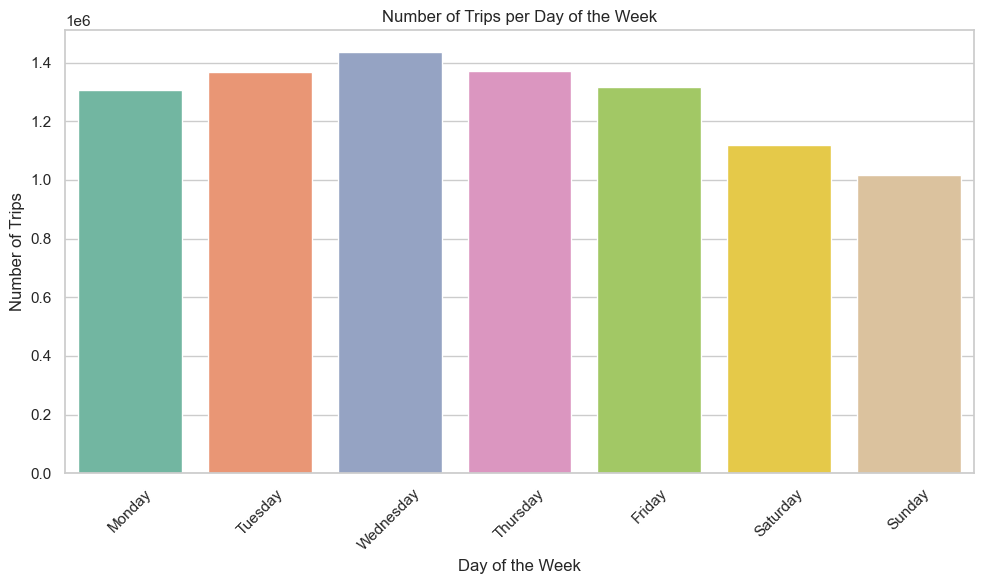

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Convert 'weekday' column to categorical type to maintain the order of days
merged_df['weekday'] = pd.Categorical(merged_df['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Group by day of the week and count the number of trips
trips_per_weekday = merged_df.groupby(['weekday'])['departure_name'].count().reset_index()
trips_per_weekday.rename(columns={'departure_name': 'num_trips'}, inplace=True)

# Create a bar plot for trips per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=trips_per_weekday, x='weekday', y='num_trips', palette='Set2')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


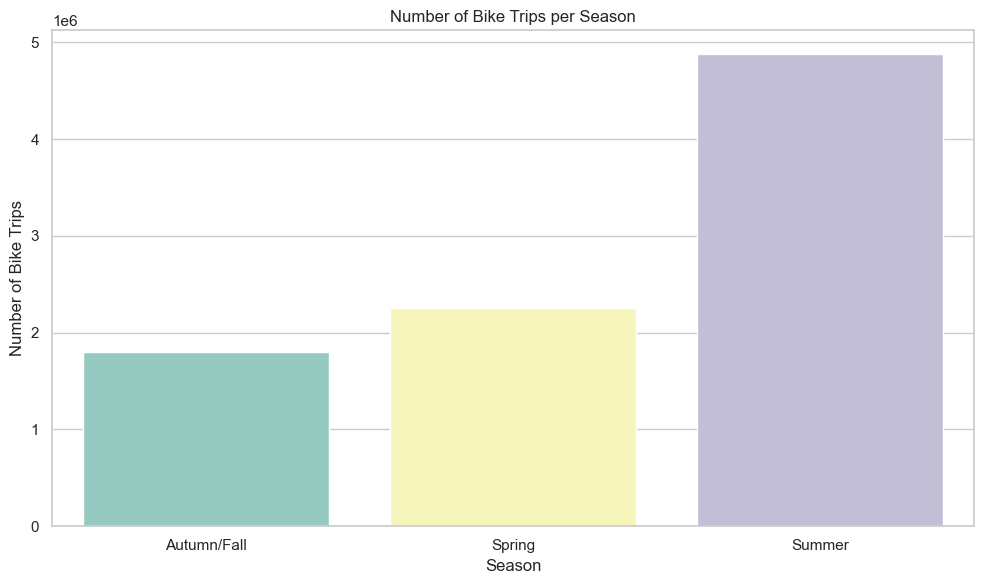

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by season and calculate the number of trips for each season
trips_per_season = merged_df.groupby('season')['departure_name'].count().reset_index()
trips_per_season.rename(columns={'departure_name': 'num_trips'}, inplace=True)

# Create a bar plot for trips per season
plt.figure(figsize=(10, 6))
sns.barplot(data=trips_per_season, x='season', y='num_trips', palette='Set3')
plt.title('Number of Bike Trips per Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Trips')
plt.tight_layout()
plt.show()

In [224]:
def categorize_time_of_day(departure_time):
    hour = departure_time.hour
    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

merged_df['time_of_day'] = merged_df['departure_time'].apply(lambda x: categorize_time_of_day(x))

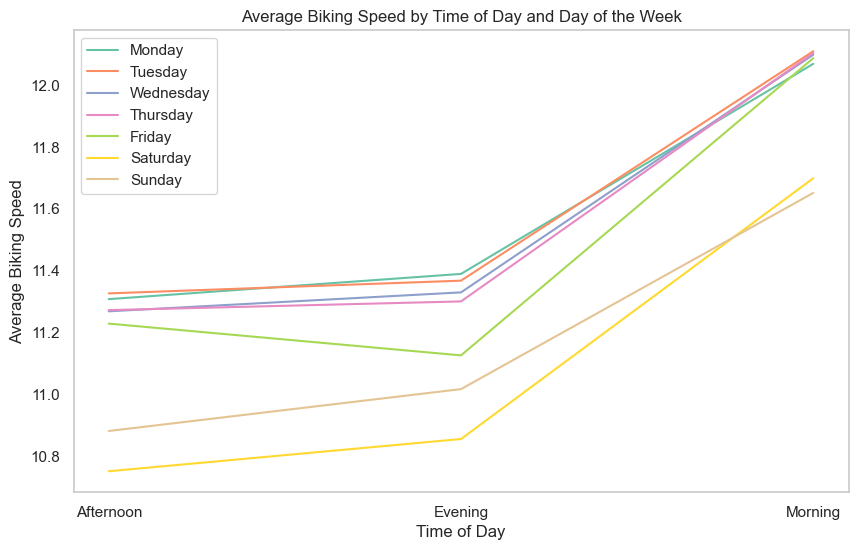

In [225]:
pivot_df = merged_df.pivot_table(index='time_of_day', columns='weekday', values='biking_speed(km/h)', aggfunc='mean')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a line plot for each day of the week
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], label=day)

plt.title('Average Biking Speed by Time of Day and Day of the Week')
plt.xlabel('Time of Day')
plt.ylabel('Average Biking Speed')
plt.legend()
plt.grid()

plt.show()

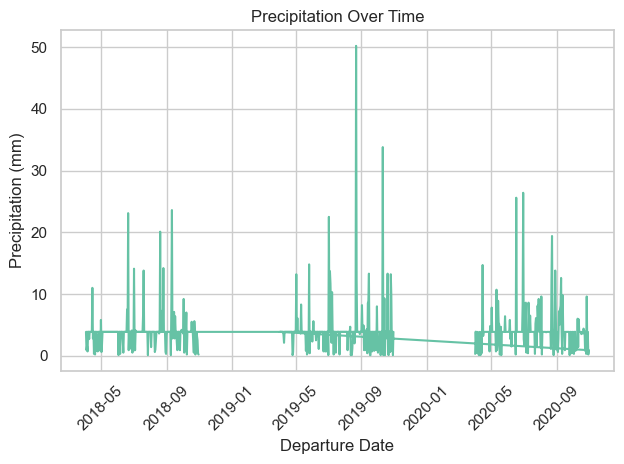

In [227]:
plt.plot(merged_df['departure_date'], merged_df['precipitation_amount_(mm)'])
plt.xlabel('Departure Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

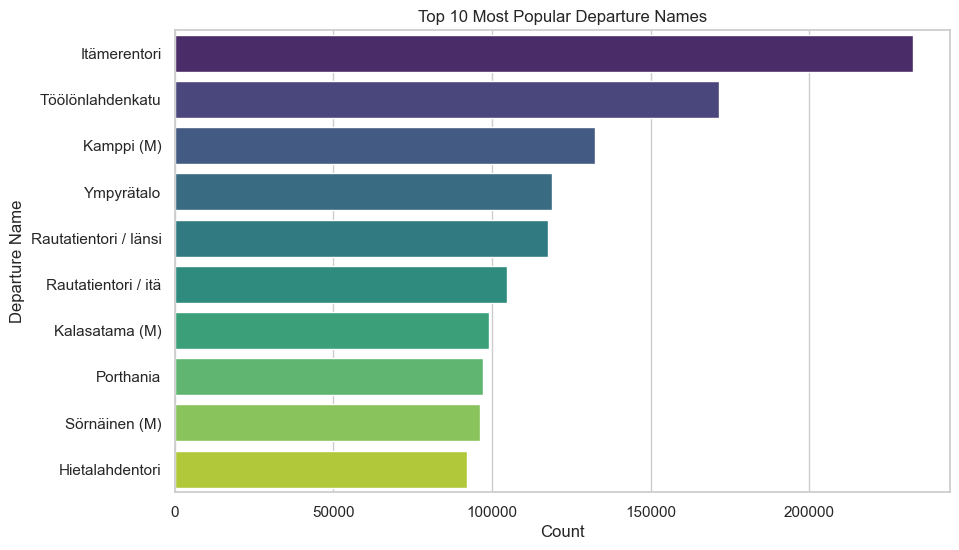

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most Popular Departure Names
top_departure_names = merged_df['departure_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_departure_names.values, y=top_departure_names.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Departure Name')
plt.title('Top 10 Most Popular Departure Names')
plt.show()

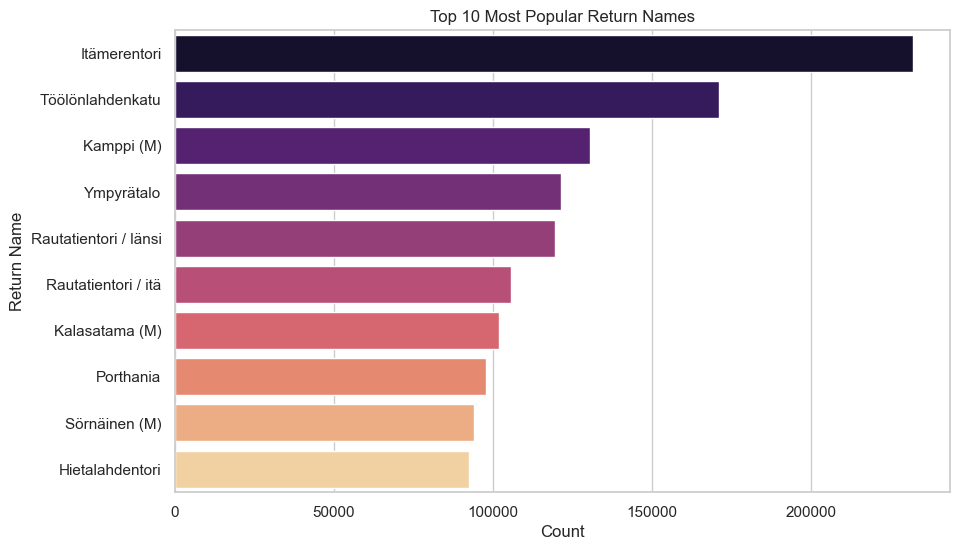

In [229]:
# Most Popular Return Names
top_return_names = merged_df['return_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_return_names.values, y=top_return_names.index, palette='magma')
plt.xlabel('Count')
plt.ylabel('Return Name')
plt.title('Top 10 Most Popular Return Names')
plt.show()

In [230]:
merged_df = merged_df.drop(['departure_name', 'return_name', 'departure_date', 'departure_time',
       'return_date', 'return_time'], axis=1)

# Correlations

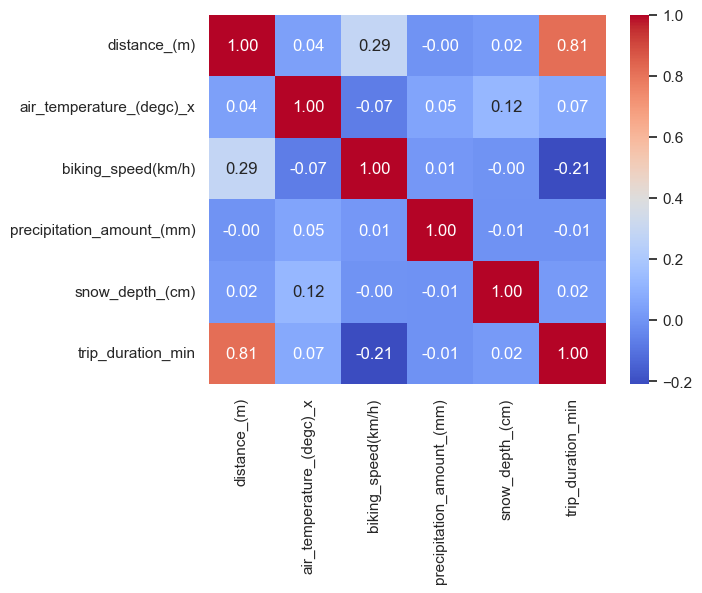

In [231]:
# Calculate the correlation matrix
correlation_matrix = merged_numerical.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt='.2f')
plt.show()

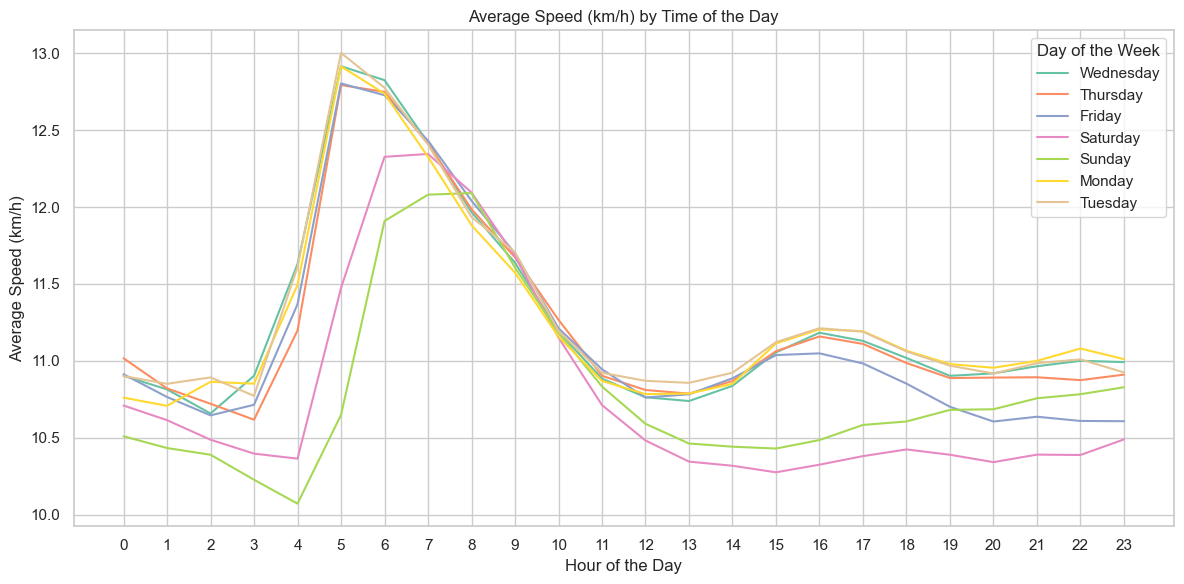

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a line plot for each day of the week
plt.figure(figsize=(12, 6))
sns.set_palette('Set2')

for day in merged_df['weekday'].unique():
    avg_speed_by_day = df[df['weekday'] == day].groupby('departure_hour')['biking_speed(km/h)'].mean()
    plt.plot(avg_speed_by_day.index, avg_speed_by_day.values, label=day)

plt.title('Average Speed (km/h) by Time of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.legend(title='Day of the Week')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

### Is there any correlation between temperature and bike use?

### Categorizing distance groups

In [233]:
def distance(m):
    if m <= 1000:
        return 0
    elif 1000 < m <=2000:
        return 1
    elif 2000 < m <=3000:
        return 2
    elif 3000 < m <=4000:
        return 3
    elif 4000 < m <= 5000:
        return 4
    else:
        return 5

In [234]:
merged_df['dist_label']=merged_df['distance_(m)'].apply(distance)

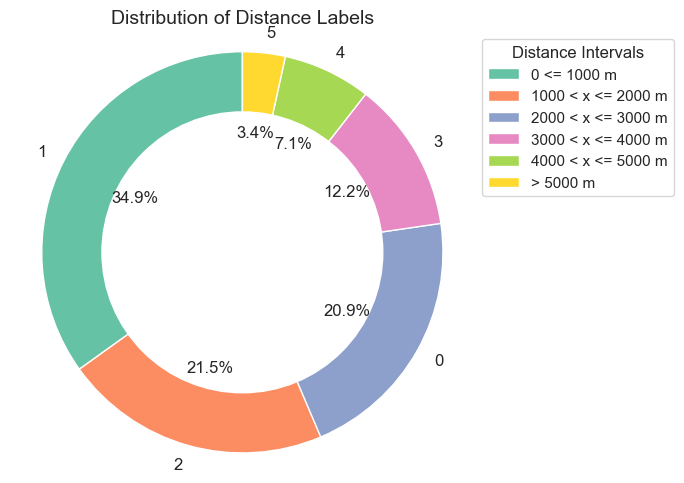

In [235]:
import matplotlib.pyplot as plt

custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

plt.figure(figsize=(7, 5))
ax = plt.subplot()

value_counts = merged_df['dist_label'].value_counts()

wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", startangle=90,
                                  colors=custom_colors, wedgeprops={'edgecolor': 'white'})

for text in texts + autotexts:
    text.set_fontsize(12)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')


plt.title('Distribution of Distance Labels', fontsize=14)

legend_labels = ['0 <= 1000 m', '1000 < x <= 2000 m', '2000 < x <= 3000 m', '3000 < x <= 4000 m',
                 '4000 < x <= 5000 m', '> 5000 m']

plt.legend(legend_labels, title="Distance Intervals", loc="upper left", bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


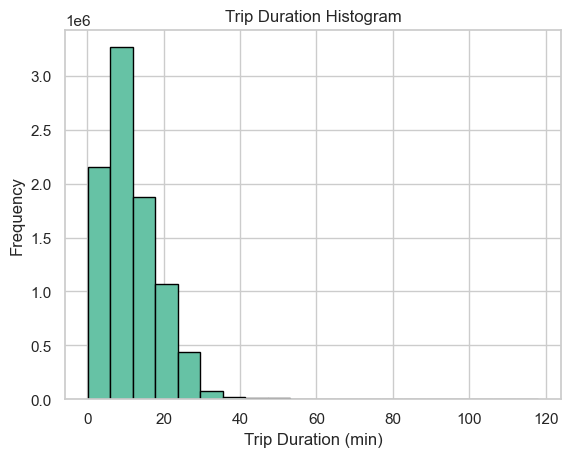

In [237]:
plt.hist(merged_df['trip_duration_min'], bins=20, edgecolor='black')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram')
plt.show()

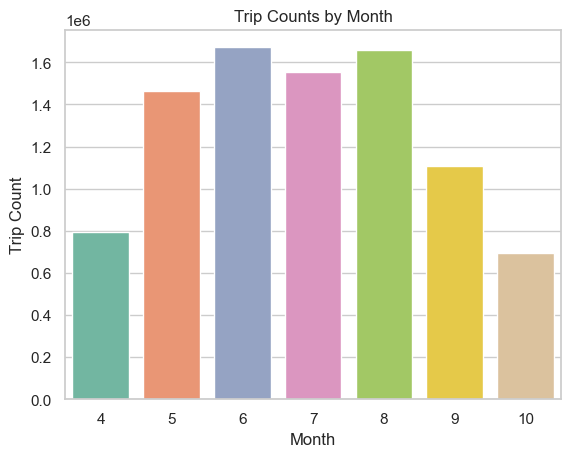

In [238]:
sns.countplot(data=merged_df, x='month')
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.title('Trip Counts by Month')
plt.show()

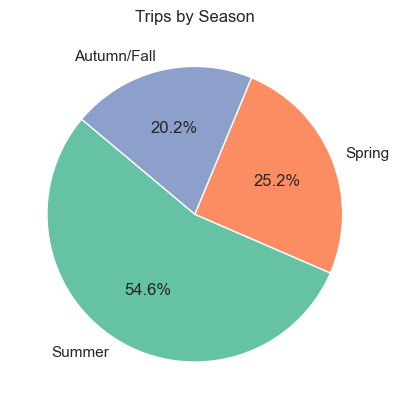

In [239]:
season_counts = merged_df['season'].value_counts()
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Trips by Season')
plt.show()

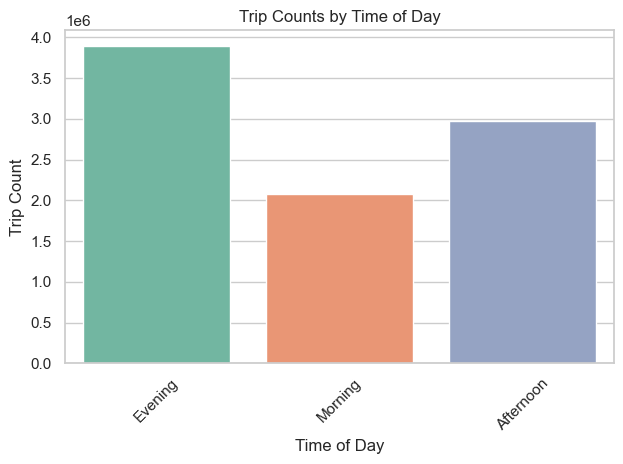

In [240]:
sns.countplot(data=merged_df, x='time_of_day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Count')
plt.title('Trip Counts by Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### From where to where?

Try to make something here with Tableau

# Modeling

In [242]:
merged_df['dist_label'] = merged_df['dist_label'].astype(object)
merged_df['temperature_range'] = merged_df['temperature_range'].astype(object)

In [245]:
merged_df['weekday'] = merged_df['weekday'].astype(object)

In [246]:
merged_df.dtypes

distance_(m)                 float64
air_temperature_(degc)_x     float64
weekday                       object
biking_speed(km/h)           float64
departure_hour                object
temperature_range             object
year                          object
month                         object
day                           object
precipitation_amount_(mm)    float64
snow_depth_(cm)              float64
season                        object
trip_duration_min            float64
time_of_day                   object
dist_label                    object
dtype: object

In [247]:
merged_df.head()

,distance_(m),air_temperature_(degc)_x,weekday,biking_speed(km/h),departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min,time_of_day,dist_label
0,999.0,3.1,Wednesday,3.464740,0,-20-0°C,2020,4,1,0.3,10.25,Spring,17.300000,Evening,0
1,2372.0,3.1,Wednesday,15.872119,0,-20-0°C,2020,4,1,0.3,10.25,Spring,8.966667,Evening,2
2,4299.0,3.1,Wednesday,14.316744,0,-20-0°C,2020,4,1,0.3,10.25,Spring,18.016667,Evening,4
3,1923.0,3.1,Wednesday,10.833803,0,-20-0°C,2020,4,1,0.3,10.25,Spring,10.650000,Evening,1
4,1376.0,3.1,Wednesday,16.964384,0,-20-0°C,2020,4,1,0.3,10.25,Spring,4.866667,Evening,1


In [248]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_(m),8939295.0,2109.063215,1277.874384,9.000000,1092.000000,1803.000000,2854.000000,5846.000000
air_temperature_(degc)_x,8939295.0,15.832080,5.631565,-4.400000,12.300000,16.600000,19.600000,32.900000
biking_speed(km/h),8939295.0,11.381677,2.936222,2.947826,9.542857,11.510298,13.377778,19.701580
precipitation_amount_(mm),8939295.0,3.986315,3.812726,0.100000,3.864773,3.864773,3.864773,50.200000
snow_depth_(cm),8939295.0,10.103444,1.215216,0.000000,10.250000,10.250000,10.250000,25.000000
trip_duration_min,8939295.0,11.514410,7.312510,0.033333,6.066667,9.783333,15.483333,118.133333


### I want to predict both distance_(m) and biking_speed(km/h)

### First, distance

In [249]:
#Choosing my target
X = merged_df.drop(['distance_(m)'], axis=1)
y = merged_df['distance_(m)']

In [250]:
X.head()

,air_temperature_(degc)_x,weekday,biking_speed(km/h),departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min,time_of_day,dist_label
0,3.1,Wednesday,3.464740,0,-20-0°C,2020,4,1,0.3,10.25,Spring,17.300000,Evening,0
1,3.1,Wednesday,15.872119,0,-20-0°C,2020,4,1,0.3,10.25,Spring,8.966667,Evening,2
2,3.1,Wednesday,14.316744,0,-20-0°C,2020,4,1,0.3,10.25,Spring,18.016667,Evening,4
3,3.1,Wednesday,10.833803,0,-20-0°C,2020,4,1,0.3,10.25,Spring,10.650000,Evening,1
4,3.1,Wednesday,16.964384,0,-20-0°C,2020,4,1,0.3,10.25,Spring,4.866667,Evening,1


In [251]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [252]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
air_temperature_(degc)_x,8939295.0,15.832080,5.631565,-4.400000,12.300000,16.600000,19.600000,32.900000
biking_speed(km/h),8939295.0,11.381677,2.936222,2.947826,9.542857,11.510298,13.377778,19.701580
precipitation_amount_(mm),8939295.0,3.986315,3.812726,0.100000,3.864773,3.864773,3.864773,50.200000
snow_depth_(cm),8939295.0,10.103444,1.215216,0.000000,10.250000,10.250000,10.250000,25.000000
trip_duration_min,8939295.0,11.514410,7.312510,0.033333,6.066667,9.783333,15.483333,118.133333


In [253]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,air_temperature_(degc)_x,biking_speed(km/h),precipitation_amount_(mm),snow_depth_(cm),trip_duration_min
0,0.201072,0.030854,0.003992,0.41,0.146204
1,0.201072,0.771427,0.003992,0.41,0.075642
2,0.201072,0.678589,0.003992,0.41,0.152272
3,0.201072,0.470699,0.003992,0.41,0.089896
4,0.201072,0.836622,0.003992,0.41,0.040926


<class 'pandas.core.frame.DataFrame'>


In [254]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
air_temperature_(degc)_x,8939295.0,0.542415,0.150980,0.0,0.447721,0.563003,0.643432,1.0
biking_speed(km/h),8939295.0,0.503401,0.175258,0.0,0.393645,0.511078,0.622544,1.0
precipitation_amount_(mm),8939295.0,0.077571,0.076102,0.0,0.075145,0.075145,0.075145,1.0
snow_depth_(cm),8939295.0,0.404138,0.048609,0.0,0.410000,0.410000,0.410000,1.0
trip_duration_min,8939295.0,0.097215,0.061918,0.0,0.051087,0.082557,0.130821,1.0


In [255]:
X_cat.head()

,weekday,departure_hour,temperature_range,year,month,day,season,time_of_day,dist_label
0,Wednesday,0,-20-0°C,2020,4,1,Spring,Evening,0
1,Wednesday,0,-20-0°C,2020,4,1,Spring,Evening,2
2,Wednesday,0,-20-0°C,2020,4,1,Spring,Evening,4
3,Wednesday,0,-20-0°C,2020,4,1,Spring,Evening,1
4,Wednesday,0,-20-0°C,2020,4,1,Spring,Evening,1


In [259]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(X_cat)
encoded_data = encoder.transform(X_cat)
encoded_data_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(X_cat.columns))
encoded_data_df

,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,departure_hour_1,departure_hour_2,departure_hour_3,departure_hour_4,departure_hour_5,departure_hour_6,departure_hour_7,departure_hour_8,departure_hour_9,departure_hour_10,departure_hour_11,departure_hour_12,departure_hour_13,departure_hour_14,departure_hour_15,departure_hour_16,departure_hour_17,departure_hour_18,departure_hour_19,departure_hour_20,departure_hour_21,departure_hour_22,departure_hour_23,temperature_range_1-20°C,temperature_range_21-40°C,year_2019,year_2020,month_5,month_6,month_7,month_8,month_9,month_10,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,season_Spring,season_Summer,time_of_day_Evening,time_of_day_Morning,dist_label_1,dist_label_2,dist_label_3,dist_label_4,dist_label_5
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939290,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8939291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8939292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8939293,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [260]:
X = pd.concat([X_normalized, encoded_data_df], axis=1)

In [261]:
X.head()

,air_temperature_(degc)_x,biking_speed(km/h),precipitation_amount_(mm),snow_depth_(cm),trip_duration_min,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,departure_hour_1,departure_hour_2,departure_hour_3,departure_hour_4,departure_hour_5,departure_hour_6,departure_hour_7,departure_hour_8,departure_hour_9,departure_hour_10,departure_hour_11,departure_hour_12,departure_hour_13,departure_hour_14,departure_hour_15,departure_hour_16,departure_hour_17,departure_hour_18,departure_hour_19,departure_hour_20,departure_hour_21,departure_hour_22,departure_hour_23,temperature_range_1-20°C,temperature_range_21-40°C,year_2019,year_2020,month_5,month_6,month_7,month_8,month_9,month_10,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,season_Spring,season_Summer,time_of_day_Evening,time_of_day_Morning,dist_label_1,dist_label_2,dist_label_3,dist_label_4,dist_label_5
0,0.201072,0.030854,0.003992,0.41,0.146204,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.201072,0.771427,0.003992,0.41,0.075642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.201072,0.678589,0.003992,0.41,0.152272,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.201072,0.470699,0.003992,0.41,0.089896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.201072,0.836622,0.003992,0.41,0.040926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [262]:
y.head()

0     999.0
1    2372.0
2    4299.0
3    1923.0
4    1376.0
Name: distance_(m), dtype: float64

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7151436, 83)
(1787859, 83)
(7151436,)
(1787859,)


In [265]:
X_train.head()

,air_temperature_(degc)_x,biking_speed(km/h),precipitation_amount_(mm),snow_depth_(cm),trip_duration_min,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,departure_hour_1,departure_hour_2,departure_hour_3,departure_hour_4,departure_hour_5,departure_hour_6,departure_hour_7,departure_hour_8,departure_hour_9,departure_hour_10,departure_hour_11,departure_hour_12,departure_hour_13,departure_hour_14,departure_hour_15,departure_hour_16,departure_hour_17,departure_hour_18,departure_hour_19,departure_hour_20,departure_hour_21,departure_hour_22,departure_hour_23,temperature_range_1-20°C,temperature_range_21-40°C,year_2019,year_2020,month_5,month_6,month_7,month_8,month_9,month_10,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,season_Spring,season_Summer,time_of_day_Evening,time_of_day_Morning,dist_label_1,dist_label_2,dist_label_3,dist_label_4,dist_label_5
6092193,0.337802,0.557730,0.075145,0.41,0.172029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1860692,0.563003,0.577763,0.075145,0.41,0.045865,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8103280,0.632708,0.486749,0.075145,0.41,0.046712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7796969,0.796247,0.417419,0.075145,0.41,0.141688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8754465,0.453083,0.583583,0.017964,0.41,0.107395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [266]:
y_train.head()

6637765    4169.0
2051383    1147.0
8829818    1027.0
8489306    2778.0
9536538    2697.0
Name: distance_(m), dtype: float64

In [267]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [268]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9686873364173646

In [269]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.968643319147239

In [270]:
y_test[:5]

4590461     871.0
9638049     679.0
1277544    1823.0
3821326    1917.0
2089904    2664.0
Name: distance_(m), dtype: float64

In [281]:
predictions_test[:5]

array([ 876.6875    ,  640.30371094, 1512.50244141, 1679.890625  ,
       2528.74658203])

In [282]:
y_train_pred = lm.predict(X_train)

In [283]:
r2_score_value_train = r2_score(y_train, y_train_pred)
mse_value_train = mean_squared_error(y_train, y_train_pred)
rmse_value_train = mean_squared_error(y_train, y_train_pred, squared=False)  # Pass squared=False to get RMSE

In [284]:
print(f"R-squared: {r2_score_value_train:.4f}")
print(f"Mean Squared Error: {mse_value_train:.4f}")
print(f"Root Mean Squared Error: {rmse_value_train:.4f}")

R-squared: 0.9687
Mean Squared Error: 51149.9066
Root Mean Squared Error: 226.1635


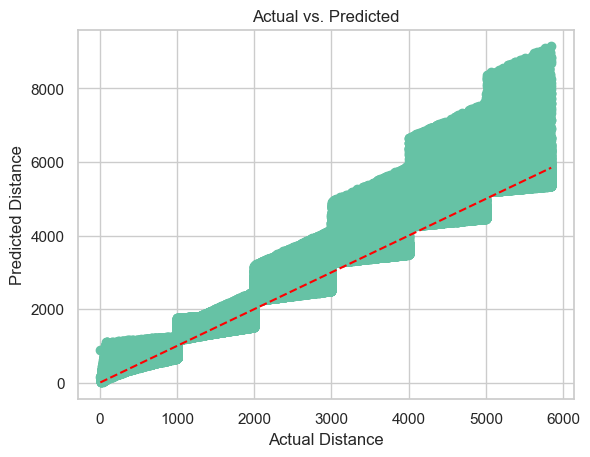

In [286]:
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.xlabel("Actual Distance")
plt.ylabel("Predicted Distance")
plt.title("Actual vs. Predicted")
plt.show()

# -------------- Trying other models ------------

In [287]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet

In [288]:
lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso=lasso.predict(X_test)

In [289]:
ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge=ridge.predict(X_test)

In [290]:
elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic=elastic.predict(X_test)

In [295]:
models=[lasso, ridge, elastic]
model_names=['lasso', 'ridge', 'elastic']
preds=[y_pred_lasso, y_pred_ridge, y_pred_elastic]

### R2

In [296]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: lasso, train R2: 0.9682949228117823 -- test R2: 0.9682393998914398
Model: ridge, train R2: 0.9686873425868942 -- test R2: 0.9686433169378844
Model: elastic, train R2: 0.21608410810857315 -- test R2: 0.21614102981897487


### MSE

In [297]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: lasso, train MSE: 51790.9226321959 -- test MSE: 51792.784508728146
Model: ridge, train MSE: 51149.89652487855 -- test MSE: 51134.10713882951
Model: elastic, train MSE: 1280543.3989665718 -- test MSE: 1278257.9229942583


### RMSE

In [298]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: lasso, train RMSE: 227.57619082890878 -- test RMSE: 227.58028145849576
Model: ridge, train RMSE: 226.16342879625466 -- test RMSE: 226.12851907450664
Model: elastic, train RMSE: 1131.6109750999112 -- test RMSE: 1130.6006912231474


Maybe use

In [292]:
# from sklearn.ensemble import RandomForestRegressor as RFR

# rfr=RFR()
# rfr.fit(X_train, y_train)

# y_pred_rfr=rfr.predict(X_test)

In [ ]:
# from xgboost import XGBRegressor as XGBR

# xgbr=XGBR()
# xgbr.fit(X_train, y_train)

# y_pred_xgbr=xgbr.predict(X_test)

In [ ]:
# from lightgbm import LGBMRegressor as LGBMR

# lgbmr=LGBMR()
# lgbmr.fit(X_train, y_train)

# y_pred_lgbmr=lgbmr.predict(X_test)